In [1]:
import pandas as pd
import numpy as np
import re
import tldextract

import warnings
warnings.filterwarnings(category=FutureWarning, action='ignore')

import matplotlib.pyplot as plt
import seaborn as sns

/Users/kendra/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


## Load Data

In [2]:
full_df = pd.read_pickle('../data/interim/train_df.pkl')

In [3]:
full_df.head()

,url,label
0,http://catholicmom.com/2016/03/15/daily-gospel...,benign
1,http://ceepharmajobs.com/2019/03/,benign
2,https://www.centralisd.com/apps/news/article/1...,benign
3,https://www.ceoutlook.com/2013/04/01/car-stere...,benign
4,http://www.celebzz.com/robots.txt,benign


In [4]:
full_df.shape

(7449443, 2)

In [5]:
df = full_df.sample(100)

In [17]:
url = df.sample()['url'].values[0]
url

'https://forums.southpark.cc.com/forum/viewtopic.php?f=19&t=26526&p=563736'

In [11]:
tld_res = tldextract.extract(url)
tld_res

ExtractResult(subdomain='www', domain='catholiccompany', suffix='com')

In [12]:
type(tld_res)

tldextract.tldextract.ExtractResult

In [13]:
tld_res.subdomain

'www'

In [14]:
tld_res.domain

'catholiccompany'

In [15]:
tld_res.suffix

'com'

# Create Features

## TLD (top level domain) parts

In [6]:
df['tld_extract'] = df['url'].map(tldextract.extract)

df['subdomain'] = df['tld_extract'].apply(lambda x: x.subdomain)
df['domain'] = df['tld_extract'].apply(lambda x: x.domain)
df['suffix'] = df['tld_extract'].apply(lambda x: x.suffix)

In [12]:
df.head()

,url,label,tld_extract,subdomain,domain,suffix
3552891,https://catused.cat.com/nl/bouw/rupsgraafmachi...,benign,"(catused, cat, com)",catused,cat,com
4932367,https://www.cbssports.com/mlb/teams/stats/KC/k...,benign,"(www, cbssports, com)",www,cbssports,com
5817193,https://www.cbsnews.com/news/cops-girlfriend-p...,benign,"(www, cbsnews, com)",www,cbsnews,com
2499166,https://auction.catawiki.com/auctions/autobidd...,benign,"(auction, catawiki, com)",auction,catawiki,com
2167067,https://cascadecenters.com/index.php?tray=topi...,benign,"(, cascadecenters, com)",,cascadecenters,com


### And their lengths

In [14]:
df['length_url'] = df['url'].map(len)
df['length_domain'] = df['domain'].map(len)

### Number of dots in domain name

In [97]:
s = 'cascade.centers'

In [98]:
s.count('.')

1

In [108]:
df['domain_dots_cnt'] = df['domain'].str.count('.')

In [109]:
df['domain_dots_cnt'].value_counts()

9     10
14     9
13     9
7      9
10     8
8      7
12     7
11     6
17     4
18     4
19     4
3      4
6      4
15     3
16     3
4      3
5      2
23     1
22     1
21     1
2      1
Name: domain_dots_cnt, dtype: int64

What did this do???

In [110]:
df[df['domain_dots_cnt'] == 14].sample(5)[['url', 'domain']]

,url,domain
1105683,https://fr.casinotoplists.com/regles-roulette,casinotoplists
2771879,https://casasdevelilla.com/tag/excursiones-por...,casasdevelilla
469491,https://casaveneracion.com/for-the-fluffiest-a...,casaveneracion
2167067,https://cascadecenters.com/index.php?tray=topi...,cascadecenters
636519,https://cdci-mediation.com/contact/fb-f-logo__...,cdci-mediation


In [102]:
test_domain = df.loc[2167067, 'domain']
test_domain

'cascadecenters'

In [103]:
test_domain.count('.')

0

Try this:

In [111]:
df['domain_dots_cnt'] = df['domain'].apply(lambda s: s.count('.'))

In [106]:
df.head()

,url,label,tld_extract,subdomain,domain,suffix,length_url,length_domain,protocol,special_char_ind,hex_pattern_ind,domain_dots_cnt
3552891,https://catused.cat.com/nl/bouw/rupsgraafmachi...,benign,"(catused, cat, com)",catused,cat,com,122,3,https,0,0,0
4932367,https://www.cbssports.com/mlb/teams/stats/KC/k...,benign,"(www, cbssports, com)",www,cbssports,com,140,9,https,0,0,0
5817193,https://www.cbsnews.com/news/cops-girlfriend-p...,benign,"(www, cbsnews, com)",www,cbsnews,com,106,7,https,0,0,0
2499166,https://auction.catawiki.com/auctions/autobidd...,benign,"(auction, catawiki, com)",auction,catawiki,com,83,8,https,0,0,0
2167067,https://cascadecenters.com/index.php?tray=topi...,benign,"(, cascadecenters, com)",,cascadecenters,com,423,14,https,1,1,0


In [107]:
df['domain_dots_cnt'].value_counts()

0    100
Name: domain_dots_cnt, dtype: int64

This worked

### Subdomain inds

In [119]:
df.head()

,url,label,tld_extract,subdomain,domain,suffix,length_url,length_domain,protocol,special_char_ind,hex_pattern_ind,domain_dots_cnt,url_slashes_cnt,subdomain_null_ind,subdomain_www_ind
3552891,https://catused.cat.com/nl/bouw/rupsgraafmachi...,benign,"(catused, cat, com)",catused,cat,com,122,3,https,0,0,0,7,0,0
4932367,https://www.cbssports.com/mlb/teams/stats/KC/k...,benign,"(www, cbssports, com)",www,cbssports,com,140,9,https,0,0,0,10,0,1
5817193,https://www.cbsnews.com/news/cops-girlfriend-p...,benign,"(www, cbsnews, com)",www,cbsnews,com,106,7,https,0,0,0,5,0,1
2499166,https://auction.catawiki.com/auctions/autobidd...,benign,"(auction, catawiki, com)",auction,catawiki,com,83,8,https,0,0,0,4,0,0
2167067,https://cascadecenters.com/index.php?tray=topi...,benign,"(, cascadecenters, com)",,cascadecenters,com,423,14,https,1,1,0,3,0,0


In [120]:
sd = df.loc[2167067, 'subdomain']
sd

''

In [121]:
sd == ''

True

In [122]:
df['subdomain_null_ind'] = np.where(df['subdomain'] == '', 1, 0)
df['subdomain_www_ind'] = np.where(df['subdomain'] == 'www', 1, 0)

In [123]:
df['subdomain_null_ind'].value_counts()

0    66
1    34
Name: subdomain_null_ind, dtype: int64

In [124]:
df['subdomain_www_ind'].value_counts()

1    50
0    50
Name: subdomain_www_ind, dtype: int64

## Number of slashes in URL

In [112]:
df['url_slashes_cnt'] = df['url'].apply(lambda x: x.count('/'))

In [113]:
df['url_slashes_cnt'].describe()

count    100.000000
mean       4.750000
std        1.565893
min        3.000000
25%        4.000000
50%        4.000000
75%        5.000000
max       10.000000
Name: url_slashes_cnt, dtype: float64

In [179]:
digits = re.compile(r'[0-9]')
df['url_digit_cnt'] = df['url'].apply(lambda x: len(re.findall(digits, x)))

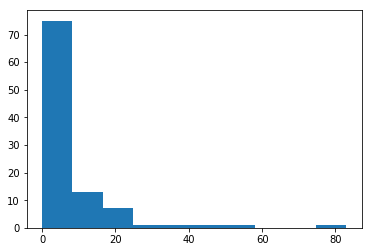

In [180]:
plt.hist(df['url_digit_cnt']);

## Subdomain
i.e. HTTP or HTTPS

In [18]:
url = df.sample()['url'].values[0]
url

'https://forums.southpark.cc.com/forum/viewtopic.php?f=19&t=26526&p=563736'

In [19]:
url.split('://')[0]

'https'

In [33]:
# this may break on larger dataset if url doesn't contain a '://'
df['protocol'] = df['url'].apply(lambda x: x.split('://')[0])

In [96]:
df['protocol'].value_counts(dropna=False)

https    70
http     30
Name: protocol, dtype: int64

Since only 2 values, this is essentially Boolean. Encode as such?

## Special Characters

In [59]:
df.loc[5817193, 'url']

'https://www.cbsnews.com/news/cops-girlfriend-pours-boiling-water-on-florida-football-player-for-attention/'

This website lists different kinds of characters in URLs: https://perishablepress.com/stop-using-unsafe-characters-in-urls/

This paper says these are suspicious characters:  _, =, (,), %, & and @.

In [62]:
special_chars = re.compile("[$-_.+!*'\(\)\,]")

In [63]:
df['special_char_ind'] = df['url'].apply(lambda x: 1 if re.search(special_chars, x) is not None else 0)

In [64]:
df['special_char_ind'].value_counts()

1    100
Name: special_char_ind, dtype: int64

Lame

In [65]:
special_chars = re.compile('[^a-zA-Z0-9:/=&_\-\.\?]')

In [38]:
url

'https://forums.southpark.cc.com/forum/viewtopic.php?f=19&t=26526&p=563736'

In [53]:
re.search(special_chars, url)

In [66]:
df['special_char_ind'] = df['url'].apply(lambda x: 1 if re.search(special_chars, x) is not None else 0)

In [67]:
df['special_char_ind'].value_counts()

0    95
1     5
Name: special_char_ind, dtype: int64

In [56]:
df[df['special_char_ind'] == 1].sample(5)['url']

5790614    http://www.certiferme.com/sante/conseil-%C2%AB...
4393411    https://cuttingtools.ceratizit.com/se/sv/bearb...
6909835    https://search.cctv.com/?qtext=%E7%AC%AC%E4%B8...
4542755    http://www.century21nets.com/name/11/27/27210/...
2167067    https://cascadecenters.com/index.php?tray=topi...
Name: url, dtype: object

In [49]:
special_url = df.loc[6909835, 'url']

In [50]:
special_url

'https://search.cctv.com/?qtext=%E7%AC%AC%E4%B8%89%E5%B1%8A%E6%96%B0%E5%86%9C%E6%9D%91%E7%94%B5%E8%A7%86%E8%89%BA%E6%9C%AF%E8%8A%82'

In [61]:
df.loc[2167067, 'url']

'https://cascadecenters.com/index.php?tray=topic&tid=top10572&cid=74&ordertop10590=datePublished&orderdirtop10590=ASC&ordertop10581=datePublished&orderdirtop10581=ASC&ordertop10589=title,%20subtitle&orderdirtop10589=ASC&ordertop10588=title,%20subtitle&orderdirtop10588=ASC&ordertop10584=datePublished&orderdirtop10584=DESC&ordertop10580=title,%20subtitle&orderdirtop10580=ASC&ordertop10592=datePublished&orderdirtop10592=ASC'

In [91]:
df.loc[5790614, 'url']

'http://www.certiferme.com/sante/conseil-%C2%AB-etude-de-l-alimentation-totale-%C2%BB-en-france-1-1196.html'

### Count

In [62]:
special_chars = re.compile("[$-_.+!*'\(\)\,]")

In [167]:
url = df.loc[5790614, 'url']
url

'http://www.certiferme.com/sante/conseil-%C2%AB-etude-de-l-alimentation-totale-%C2%BB-en-france-1-1196.html'

In [170]:
len(re.findall(special_chars, url))

4

In [172]:
df['special_char_cnt'] = df['url'].apply(lambda x: len(re.findall(special_chars, x)))

In [173]:
reserved_chars = re.compile(r'[;/\?:@=&]')

In [177]:
df['reserved_char_cnt'] = df['url'].apply(lambda x: len(re.findall(reserved_chars, x)))

(array([97.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([ 0. ,  4.5,  9. , 13.5, 18. , 22.5, 27. , 31.5, 36. , 40.5, 45. ]),
 <a list of 10 Patch objects>)

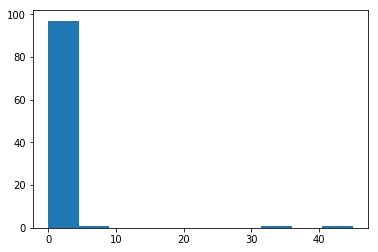

In [175]:
plt.hist(df['special_char_cnt']);

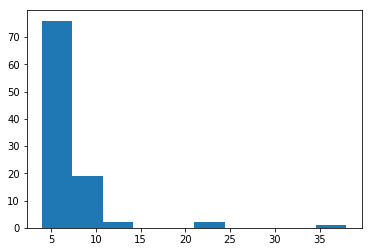

In [178]:
plt.hist(df['reserved_char_cnt']);

## Hex

This post suggests %[A-Z][A-Z] is URL-encoding of hex: https://stackoverflow.com/questions/25222973/weird-characters-in-url

This page confirms that encoding consists of one or more character triplets, starting with `%`, followed by two hexadecimal digis (i.e. [0-9A-Z]): https://www.url-encode-decode.com/

See also: https://en.wikipedia.org/wiki/Percent-encoding

In [92]:
hex_pattern = re.compile("(%[0-9A-F]{2})")

In [81]:
special_url

'https://search.cctv.com/?qtext=%E7%AC%AC%E4%B8%89%E5%B1%8A%E6%96%B0%E5%86%9C%E6%9D%91%E7%94%B5%E8%A7%86%E8%89%BA%E6%9C%AF%E8%8A%82'

In [82]:
re.search(hex_pattern, special_url)

<_sre.SRE_Match object; span=(31, 130), match='%E7%AC%AC%E4%B8%89%E5%B1%8A%E6%96%B0%E5%86%9C%E6%>

In [93]:
df['hex_pattern_ind'] = df['url'].apply(lambda x: 1 if re.search(hex_pattern, x) is not None else 0)

In [94]:
df['hex_pattern_ind'].value_counts()

0    95
1     5
Name: hex_pattern_ind, dtype: int64

In [95]:
df[df['hex_pattern_ind'] == 1]['url']

2167067    https://cascadecenters.com/index.php?tray=topi...
5790614    http://www.certiferme.com/sante/conseil-%C2%AB...
6909835    https://search.cctv.com/?qtext=%E7%AC%AC%E4%B8...
4393411    https://cuttingtools.ceratizit.com/se/sv/bearb...
4542755    http://www.century21nets.com/name/11/27/27210/...
Name: url, dtype: object

These are the same as the 'special character' URLs. Consider modifying special characters to not include Hex char's

In [115]:
df.head()

,url,label,tld_extract,subdomain,domain,suffix,length_url,length_domain,protocol,special_char_ind,hex_pattern_ind,domain_dots_cnt,url_slashes_cnt
3552891,https://catused.cat.com/nl/bouw/rupsgraafmachi...,benign,"(catused, cat, com)",catused,cat,com,122,3,https,0,0,0,7
4932367,https://www.cbssports.com/mlb/teams/stats/KC/k...,benign,"(www, cbssports, com)",www,cbssports,com,140,9,https,0,0,0,10
5817193,https://www.cbsnews.com/news/cops-girlfriend-p...,benign,"(www, cbsnews, com)",www,cbsnews,com,106,7,https,0,0,0,5
2499166,https://auction.catawiki.com/auctions/autobidd...,benign,"(auction, catawiki, com)",auction,catawiki,com,83,8,https,0,0,0,4
2167067,https://cascadecenters.com/index.php?tray=topi...,benign,"(, cascadecenters, com)",,cascadecenters,com,423,14,https,1,1,0,3


## Path

In [125]:
url

'https://forums.southpark.cc.com/forum/viewtopic.php?f=19&t=26526&p=563736'

In [126]:
url.split('/')

['https:',
 '',
 'forums.southpark.cc.com',
 'forum',
 'viewtopic.php?f=19&t=26526&p=563736']

In [127]:
url.split('/')[3]

'forum'

In [128]:
df['path'] = df['url'].apply(lambda x: x.split('/')[3])

In [136]:
df.sample(5)[['url', 'path']]

,url,path
4268449,https://www.celebratelocalohio.com/products/oh...,products
4405878,https://www.cartonionline.com/en/shop/School/b...,en
2499166,https://auction.catawiki.com/auctions/autobidd...,auctions
1391004,https://carvaganza.com/tag/fiat/,tag
3147171,https://www.cctimesdemocrat.com/blogs/1209/ent...,blogs


Nope

In [137]:
path_pattern = re.compile(r'http[s]://[a-z0-9]?.[a-z0-9]*.[a-z0-9]*/(.*)\[?]?')

In [138]:
test_url = df.loc[2332535, 'url']
test_url

'https://www.celesteprize.com/artwork/ido:21518/'

In [139]:
re.match(path_pattern, test_url)

In [140]:
path_pattern = re.compile(r'(\/[0-9].*\?|$)')

In [141]:
re.match(path_pattern, test_url)

In [142]:
re.search(path_pattern, test_url)

<_sre.SRE_Match object; span=(47, 47), match=''>

In [135]:
test_url = df.loc[1012443, 'url']
test_url

'https://www.casimedicos.com/foro/posts/153174/reactions'

In [146]:
df['query_ind'] = df['url'].apply(lambda x: 1 if x.count('?') > 0 else 0)

In [147]:
df['query_ind'].value_counts()

0    80
1    20
Name: query_ind, dtype: int64

In [148]:
df[df['query_ind'] == 1].sample(5)['url']

3104010    https://recursos.catequesisdegalicia.com/mod/r...
4932367    https://www.cbssports.com/mlb/teams/stats/KC/k...
1494963    https://www.cbssports.com/mlb/teams/stats/TEX/...
1170203    https://www.catawiki.com/catalog/view_collecto...
1748759    http://cellreturn.com/product/list.html?cate_n...
Name: url, dtype: object

In [390]:
test_url = df.loc[4932367, 'url']
test_url

'https://www.cbssports.com/mlb/teams/stats/KC/kansas-city-royals/regularseason/PIT-BASIC/yearly?_3:col_1=2&_3:col_2=13&_1:col_1=6&_1:col_2=11'

In [150]:
re.search(path_pattern, test_url)

<_sre.SRE_Match object; span=(140, 140), match=''>

In [151]:
test_url[140:]

''

Look here: https://www.oreilly.com/library/view/regular-expressions-cookbook/9780596802837/ch07s12.html

In [410]:
PATH_REGEX = re.compile(r"^([a-z][a-z0-9+\-.]*:(//[^/?#]+)?)?([a-zA-Z0-9\-._~%!$&'()*+,;=:@/]*)")

In [397]:
path_regex = re.compile(r"([a-z0-9\-._~%!$&'()*+,;=:@/]*)")

In [407]:
test_url = df.loc[4932367, 'url']
test_url

'https://www.cbssports.com/mlb/teams/stats/KC/kansas-city-royals/regularseason/PIT-BASIC/yearly?_3:col_1=2&_3:col_2=13&_1:col_1=6&_1:col_2=11'

In [408]:
re.match(path_regex, test_url)

<_sre.SRE_Match object; span=(0, 42), match='https://www.cbssports.com/mlb/teams/stats/'>

In [409]:
re.findall(path_regex, test_url)

['https://www.cbssports.com/mlb/teams/stats/',
 '',
 '',
 '/kansas-city-royals/regularseason/',
 '',
 '',
 '',
 '-',
 '',
 '',
 '',
 '',
 '',
 '/yearly',
 '',
 '_3:col_1=2&_3:col_2=13&_1:col_1=6&_1:col_2=11',
 '']

In [411]:
re.findall(PATH_REGEX, test_url)

[('https://www.cbssports.com',
  '//www.cbssports.com',
  '/mlb/teams/stats/KC/kansas-city-royals/regularseason/PIT-BASIC/yearly')]

In [399]:
re.findall(PATH_REGEX, test_url)[0][-1]

'/mlb/teams/stats/KC/kansas-city-royals/regularseason/PIT-BASIC/yearly'

In [400]:
re.search(PATH_REGEX, test_url)

<_sre.SRE_Match object; span=(0, 94), match='https://www.cbssports.com/mlb/teams/stats/KC/kans>

In [412]:
test_url = 'http://www.example.com'

In [413]:
re.match(PATH_REGEX, test_url)

<_sre.SRE_Match object; span=(0, 22), match='http://www.example.com'>

In [414]:
re.findall(PATH_REGEX, test_url)

[('http://www.example.com', '//www.example.com', '')]

In [204]:
PATH_REGEX = re.compile(r"([a-z0-9\-._~%!$&'()*+,;=:@/]*)")

In [206]:
re.match(PATH_REGEX, test_url)

<_sre.SRE_Match object; span=(0, 42), match='https://www.cbssports.com/mlb/teams/stats/'>

In [224]:
df['path'] = df['url'].apply(lambda x: re.findall(PATH_REGEX, x)[0][-1])

In [226]:
df[['url', 'path']].head()

,url,path
3552891,https://catused.cat.com/nl/bouw/rupsgraafmachi...,/nl/bouw/rupsgraafmachines/other-us-mfgrs-trac...
4932367,https://www.cbssports.com/mlb/teams/stats/KC/k...,/mlb/teams/stats/KC/kansas-city-royals/regular...
5817193,https://www.cbsnews.com/news/cops-girlfriend-p...,/news/cops-girlfriend-pours-boiling-water-on-f...
2499166,https://auction.catawiki.com/auctions/autobidd...,/auctions/autobidding
2167067,https://cascadecenters.com/index.php?tray=topi...,/index.php


In [276]:
df['length_path'] = df['path'].map(len)

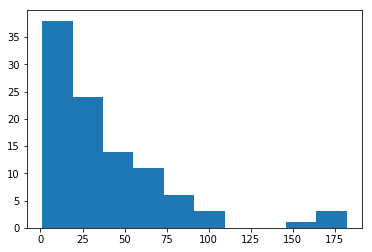

In [277]:
plt.hist(df['length_path']);

In [278]:
df['length_path'].describe()

count    100.000000
mean      39.440000
std       35.989426
min        1.000000
25%       15.750000
50%       26.000000
75%       50.500000
max      182.000000
Name: length_path, dtype: float64

In [280]:
df[df['length_path'] == 1][['url', 'path']]

,url,path
6909835,https://search.cctv.com/?qtext=%E7%AC%AC%E4%B8...,/


In [282]:
df[df['length_path'] == 1]['url'].values[0]

'https://search.cctv.com/?qtext=%E7%AC%AC%E4%B8%89%E5%B1%8A%E6%96%B0%E5%86%9C%E6%9D%91%E7%94%B5%E8%A7%86%E8%89%BA%E6%9C%AF%E8%8A%82'

### Num dots

In [283]:
df['path_dot_cnt'] = df['path'].apply(lambda x: x.count('.'))

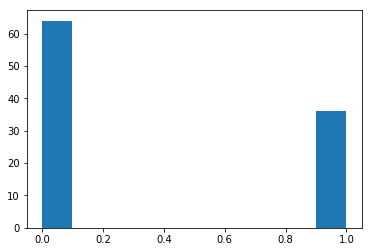

In [284]:
plt.hist(df['path_dot_cnt']);

## Query

In [254]:
QUERY_REGEX = re.compile(r"\?([a-z0-9\-._~%!$&'()*+,;=:@/]*)#?")

In [213]:
re.match(QUERY_REGEX, test_url)

In [215]:
re.findall(QUERY_REGEX, test_url)

['_3:col_1=2&_3:col_2=13&_1:col_1=6&_1:col_2=11']

In [216]:
re.search(QUERY_REGEX, test_url)

<_sre.SRE_Match object; span=(94, 140), match='?_3:col_1=2&_3:col_2=13&_1:col_1=6&_1:col_2=11'>

In [214]:
test_url

'https://www.cbssports.com/mlb/teams/stats/KC/kansas-city-royals/regularseason/PIT-BASIC/yearly?_3:col_1=2&_3:col_2=13&_1:col_1=6&_1:col_2=11'

In [249]:
test_url = df.loc[2499166, 'url']
test_url

'https://auction.catawiki.com/auctions/autobidding?auction_id=257435&lot_id=28724703'

In [251]:
re.match(QUERY_REGEX, test_url)

In [244]:
re.search(QUERY_REGEX, test_url).group(0)

'?auction_id=257435&lot_id=28724703'

In [240]:
re.findall(QUERY_REGEX, test_url)

['auction_id=257435&lot_id=28724703']

In [247]:
test_url = df.loc[5817193, 'url']
test_url

'https://www.cbsnews.com/news/cops-girlfriend-pours-boiling-water-on-florida-football-player-for-attention/'

In [248]:
re.search(QUERY_REGEX, test_url).group(0)

AttributeError: 'NoneType' object has no attribute 'group'

In [ ]:
df['query_stg'] = df['url'].apply(lambda x: re.search(QUERY_REGEX, x))

In [258]:
df[['url', 'query_stg']].head()

,url,query_stg
3552891,https://catused.cat.com/nl/bouw/rupsgraafmachi...,None
4932367,https://www.cbssports.com/mlb/teams/stats/KC/k...,"<_sre.SRE_Match object; span=(94, 140), match=..."
5817193,https://www.cbsnews.com/news/cops-girlfriend-p...,None
2499166,https://auction.catawiki.com/auctions/autobidd...,"<_sre.SRE_Match object; span=(49, 83), match='..."
2167067,https://cascadecenters.com/index.php?tray=topi...,"<_sre.SRE_Match object; span=(36, 86), match='..."


In [259]:
df['query'] = df['query_stg'].group(0) if df['query_stg'] else None]
# np.where(df['query_stg'] is not None,
#                        df['query_stg'].apply(lambda x: x.group(0)), 
#                        None)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [271]:
Xdf['query'] = np.where(~df['query_stg'].isna(),
                       df['query_stg'].apply(lambda x: x.group(0)),
                       None)

AttributeError: 'NoneType' object has no attribute 'group'

In [272]:
def get_query(url):
    try: 
        return re.search(QUERY_REGEX, url).group(0)
    except AttributeError:
        return None

In [274]:
df['query'] = df['url'].apply(get_query)

In [275]:
df[['url', 'query_stg', 'query']].head()

,url,query_stg,query
3552891,https://catused.cat.com/nl/bouw/rupsgraafmachi...,None,None
4932367,https://www.cbssports.com/mlb/teams/stats/KC/k...,"<_sre.SRE_Match object; span=(94, 140), match=...",?_3:col_1=2&_3:col_2=13&_1:col_1=6&_1:col_2=11
5817193,https://www.cbsnews.com/news/cops-girlfriend-p...,None,None
2499166,https://auction.catawiki.com/auctions/autobidd...,"<_sre.SRE_Match object; span=(49, 83), match='...",?auction_id=257435&lot_id=28724703
2167067,https://cascadecenters.com/index.php?tray=topi...,"<_sre.SRE_Match object; span=(36, 86), match='...",?tray=topic&tid=top10572&cid=74&ordertop10590=...


## Entropy

In [152]:
from collections import Counter

def shannon_specific_entropy(X):
    N = len(X)
    c = Counter(X)
    n = len(c.keys())
    h_sum = 0
    for x, n_i in c.items():
        f_i = n_i/N
        h_sum += (f_i) * np.log2(f_i)
        
    h_sum = -h_sum
    return h_sum

In [153]:
url

'https://forums.southpark.cc.com/forum/viewtopic.php?f=19&t=26526&p=563736'

In [154]:
shannon_specific_entropy(url)

4.627998963423238

In [155]:
df.head()

,url,label,tld_extract,subdomain,domain,suffix,length_url,length_domain,protocol,special_char_ind,hex_pattern_ind,domain_dots_cnt,url_slashes_cnt,subdomain_null_ind,subdomain_www_ind,path,query_ind
3552891,https://catused.cat.com/nl/bouw/rupsgraafmachi...,benign,"(catused, cat, com)",catused,cat,com,122,3,https,0,0,0,7,0,0,nl,0
4932367,https://www.cbssports.com/mlb/teams/stats/KC/k...,benign,"(www, cbssports, com)",www,cbssports,com,140,9,https,0,0,0,10,0,1,mlb,1
5817193,https://www.cbsnews.com/news/cops-girlfriend-p...,benign,"(www, cbsnews, com)",www,cbsnews,com,106,7,https,0,0,0,5,0,1,news,0
2499166,https://auction.catawiki.com/auctions/autobidd...,benign,"(auction, catawiki, com)",auction,catawiki,com,83,8,https,0,0,0,4,0,0,auctions,1
2167067,https://cascadecenters.com/index.php?tray=topi...,benign,"(, cascadecenters, com)",,cascadecenters,com,423,14,https,1,1,0,3,1,0,index.php?tray=topic&tid=top10572&cid=74&order...,1


In [158]:
tld_extract = df.loc[5817193, 'tld_extract']
'.'.join(tld_extract)

'www.cbsnews.com'

In [159]:
df['hostname'] = df['tld_extract'].apply(lambda x: '.'.join(x))

In [160]:
df['hostname_entropy'] = df['hostname'].apply(shannon_specific_entropy)

In [161]:
df.head()

,url,label,tld_extract,subdomain,domain,suffix,length_url,length_domain,protocol,special_char_ind,hex_pattern_ind,domain_dots_cnt,url_slashes_cnt,subdomain_null_ind,subdomain_www_ind,path,query_ind,hostname,hostname_entropy
3552891,https://catused.cat.com/nl/bouw/rupsgraafmachi...,benign,"(catused, cat, com)",catused,cat,com,122,3,https,0,0,0,7,0,0,nl,0,catused.cat.com,3.189898
4932367,https://www.cbssports.com/mlb/teams/stats/KC/k...,benign,"(www, cbssports, com)",www,cbssports,com,140,9,https,0,0,0,10,0,1,mlb,1,www.cbssports.com,3.175123
5817193,https://www.cbsnews.com/news/cops-girlfriend-p...,benign,"(www, cbsnews, com)",www,cbsnews,com,106,7,https,0,0,0,5,0,1,news,0,www.cbsnews.com,2.973557
2499166,https://auction.catawiki.com/auctions/autobidd...,benign,"(auction, catawiki, com)",auction,catawiki,com,83,8,https,0,0,0,4,0,0,auctions,1,auction.catawiki.com,3.308695
2167067,https://cascadecenters.com/index.php?tray=topi...,benign,"(, cascadecenters, com)",,cascadecenters,com,423,14,https,1,1,0,3,1,0,index.php?tray=topic&tid=top10572&cid=74&order...,1,.cascadecenters.com,3.260828


In [162]:
df['url_entropy'] = df['url'].apply(shannon_specific_entropy)

## Hostname

In [285]:
df['hostname_dash_cnt'] = df['hostname'].apply(lambda x: x.count('-'))

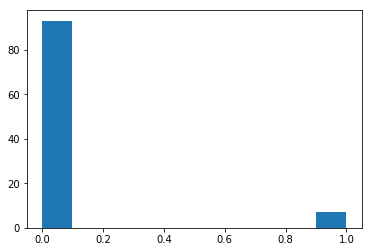

In [286]:
plt.hist(df['hostname_dash_cnt']);

## Suspicious words

In [181]:
s = 'www.example.com/php'

s.count('php')

1

In [186]:
df['url_php_ind'] = np.where(df['url'].str.count('php') == 0, 0, 1)

In [187]:
df.head()

,url,label,tld_extract,subdomain,domain,suffix,length_url,length_domain,protocol,special_char_ind,...,query_ind,hostname,hostname_entropy,url_entropy,special_char_cnt,reserced_char_cnt,reserved_char_cnt,url_digit_cnt,url_php,url_php_ind
3552891,https://catused.cat.com/nl/bouw/rupsgraafmachi...,benign,"(catused, cat, com)",catused,cat,com,122,3,https,0,...,0,catused.cat.com,3.189898,4.749386,0,8,8,18,0,0
4932367,https://www.cbssports.com/mlb/teams/stats/KC/k...,benign,"(www, cbssports, com)",www,cbssports,com,140,9,https,0,...,1,www.cbssports.com,3.175123,4.851127,0,23,23,14,0,0
5817193,https://www.cbsnews.com/news/cops-girlfriend-p...,benign,"(www, cbsnews, com)",www,cbsnews,com,106,7,https,0,...,0,www.cbsnews.com,2.973557,4.297062,0,6,6,0,0,0
2499166,https://auction.catawiki.com/auctions/autobidd...,benign,"(auction, catawiki, com)",auction,catawiki,com,83,8,https,0,...,1,auction.catawiki.com,3.308695,4.559759,0,9,9,14,0,0
2167067,https://cascadecenters.com/index.php?tray=topi...,benign,"(, cascadecenters, com)",,cascadecenters,com,423,14,https,1,...,1,.cascadecenters.com,3.260828,4.666683,6,38,38,83,1,1


In [188]:
SUSPICIOUS_WORDS = ['php', 'abuse', 'admin', 'verification']

for word in SUSPICIOUS_WORDS:
    col_name = word + '_ind'
    df[col_name] = np.where(df['url'].str.count(word) == 0, 0, 1)

In [189]:
df.head()

,url,label,tld_extract,subdomain,domain,suffix,length_url,length_domain,protocol,special_char_ind,...,special_char_cnt,reserced_char_cnt,reserved_char_cnt,url_digit_cnt,url_php,url_php_ind,php_ind,abuse_ind,admin_ind,verification_ind
3552891,https://catused.cat.com/nl/bouw/rupsgraafmachi...,benign,"(catused, cat, com)",catused,cat,com,122,3,https,0,...,0,8,8,18,0,0,0,0,0,0
4932367,https://www.cbssports.com/mlb/teams/stats/KC/k...,benign,"(www, cbssports, com)",www,cbssports,com,140,9,https,0,...,0,23,23,14,0,0,0,0,0,0
5817193,https://www.cbsnews.com/news/cops-girlfriend-p...,benign,"(www, cbsnews, com)",www,cbsnews,com,106,7,https,0,...,0,6,6,0,0,0,0,0,0,0
2499166,https://auction.catawiki.com/auctions/autobidd...,benign,"(auction, catawiki, com)",auction,catawiki,com,83,8,https,0,...,0,9,9,14,0,0,0,0,0,0
2167067,https://cascadecenters.com/index.php?tray=topi...,benign,"(, cascadecenters, com)",,cascadecenters,com,423,14,https,1,...,6,38,38,83,1,1,1,0,0,0


In [303]:
url = df.loc[2167067, 'url']

In [304]:
url

'https://cascadecenters.com/index.php?tray=topic&tid=top10572&cid=74&ordertop10590=datePublished&orderdirtop10590=ASC&ordertop10581=datePublished&orderdirtop10581=ASC&ordertop10589=title,%20subtitle&orderdirtop10589=ASC&ordertop10588=title,%20subtitle&orderdirtop10588=ASC&ordertop10584=datePublished&orderdirtop10584=DESC&ordertop10580=title,%20subtitle&orderdirtop10580=ASC&ordertop10592=datePublished&orderdirtop10592=ASC'

## NLP

In [298]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

In [302]:
stopwords = set(ENGLISH_STOP_WORDS).union(set(('com', 'net', 'gov', 'edu', 'http', 'https', 'www')))

In [320]:
vectorizer = TfidfVectorizer(ngram_range=(1,1), 
#                              token_pattern=tp, # token_pattern,
                             stop_words=stopwords)
X = vectorizer.fit_transform(df['url'])

In [ ]:
vectorizer.idf_

In [323]:
idf_dict = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))

In [389]:
idf_dict

{'01': 4.228826155721369,
 '03': 4.51650822817315,
 '04': 4.921973336281314,
 '05': 4.921973336281314,
 '06': 4.921973336281314,
 '09': 4.51650822817315,
 '0d3be9a10902d2151618387ef9e3b4597672c26e': 4.921973336281314,
 '10': 4.51650822817315,
 '100': 4.921973336281314,
 '1085011': 4.921973336281314,
 '11': 4.005682604407159,
 '11232': 4.921973336281314,
 '1196': 4.921973336281314,
 '12': 4.921973336281314,
 '1209': 4.921973336281314,
 '13': 4.228826155721369,
 '138': 4.921973336281314,
 '14': 4.921973336281314,
 '140979': 4.921973336281314,
 '153174': 4.921973336281314,
 '15380': 4.921973336281314,
 '16875': 4.921973336281314,
 '18': 4.51650822817315,
 '19': 4.921973336281314,
 '1973': 4.921973336281314,
 '20': 4.921973336281314,
 '2012': 4.51650822817315,
 '2015': 4.921973336281314,
 '2018': 4.51650822817315,
 '2019': 4.228826155721369,
 '2063': 4.921973336281314,
 '20subtitle': 4.921973336281314,
 '21037': 4.921973336281314,
 '21518': 4.921973336281314,
 '23': 4.921973336281314,
 '24

In [324]:
idf_list = list(zip(vectorizer.get_feature_names(), vectorizer.idf_))

In [325]:
idf_list[:10]

[('01', 4.228826155721369),
 ('03', 4.51650822817315),
 ('04', 4.921973336281314),
 ('05', 4.921973336281314),
 ('06', 4.921973336281314),
 ('09', 4.51650822817315),
 ('0d3be9a10902d2151618387ef9e3b4597672c26e', 4.921973336281314),
 ('10', 4.51650822817315),
 ('100', 4.921973336281314),
 ('1085011', 4.921973336281314)]

In [337]:
df['url']

3552891    https://catused.cat.com/nl/bouw/rupsgraafmachi...
4932367    https://www.cbssports.com/mlb/teams/stats/KC/k...
5817193    https://www.cbsnews.com/news/cops-girlfriend-p...
2499166    https://auction.catawiki.com/auctions/autobidd...
2167067    https://cascadecenters.com/index.php?tray=topi...
4461762        http://www.cfbattery.com/686rit_173r1y_263788
5418554    https://catulloprimemeats.com/blogs/recipes/ta...
5790614    http://www.certiferme.com/sante/conseil-%C2%AB...
217088           http://zn8pd.cchdfwwb.com/soft/1085011.html
469491     https://casaveneracion.com/for-the-fluffiest-a...
1170203    https://www.catawiki.com/catalog/view_collecto...
4348618    https://cbdliving.com/products/cbd-living-disp...
5516243    http://casino-zilla.com/bonus-sui-depositi/bon...
3147171    https://www.cctimesdemocrat.com/blogs/1209/ent...
3966286    https://www.casinoer.com/vinn-din-daglige-dose...
4894005              https://www.celebsages.com/devyn-lundy/
1105683        https://f

In [328]:
res = list(zip(vectorizer.vocabulary_, X.toarray()[0]))

In [330]:
nonzero_res = [x for x in res if x[1] != 0]

In [331]:
nonzero_res

[('lot_id', 0.2802741930156276),
 ('tid', 0.2802741930156276),
 ('casaveneracion', 0.2802741930156276),
 ('cbd', 0.2802741930156276),
 ('celesteprize', 0.2802741930156276),
 ('diagrams', 0.24080399409348685),
 ('total', 0.24080399409348685),
 ('e4', 0.2802741930156276),
 ('fiat', 0.2802741930156276),
 ('725d9df4948d', 0.14119850169557),
 ('air', 0.2802741930156276),
 ('practical', 0.2802741930156276),
 ('editions', 0.2802741930156276),
 ('cas7ino', 0.2802741930156276)]

In [336]:
df.head(1)['url'].values[0]

'https://catused.cat.com/nl/bouw/rupsgraafmachines/other-us-mfgrs-track-excavator/3bb8245d-e2f4-4ce7-af2f-a088bba71174.html'

In [338]:
df.head()

,url,label,tld_extract,subdomain,domain,suffix,length_url,length_domain,protocol,special_char_ind,...,url_php_ind,php_ind,abuse_ind,admin_ind,verification_ind,query_stg,query,length_path,path_dot_cnt,hostname_dash_cnt
3552891,https://catused.cat.com/nl/bouw/rupsgraafmachi...,benign,"(catused, cat, com)",catused,cat,com,122,3,https,0,...,0,0,0,0,0,None,None,99,1,0
4932367,https://www.cbssports.com/mlb/teams/stats/KC/k...,benign,"(www, cbssports, com)",www,cbssports,com,140,9,https,0,...,0,0,0,0,0,"<_sre.SRE_Match object; span=(94, 140), match=...",?_3:col_1=2&_3:col_2=13&_1:col_1=6&_1:col_2=11,69,0,0
5817193,https://www.cbsnews.com/news/cops-girlfriend-p...,benign,"(www, cbsnews, com)",www,cbsnews,com,106,7,https,0,...,0,0,0,0,0,None,None,83,0,0
2499166,https://auction.catawiki.com/auctions/autobidd...,benign,"(auction, catawiki, com)",auction,catawiki,com,83,8,https,0,...,0,0,0,0,0,"<_sre.SRE_Match object; span=(49, 83), match='...",?auction_id=257435&lot_id=28724703,21,0,0
2167067,https://cascadecenters.com/index.php?tray=topi...,benign,"(, cascadecenters, com)",,cascadecenters,com,423,14,https,1,...,1,1,0,0,0,"<_sre.SRE_Match object; span=(36, 86), match='...",?tray=topic&tid=top10572&cid=74&ordertop10590=...,10,1,0


In [339]:
X = vectorizer.fit_transform(df['url'][:10])

In [344]:
res = list(zip(vectorizer.get_feature_names(), X.toarray()[0]))

In [345]:
nonzero_res = [x for x in res if x[1] != 0]

In [336]:
df.head(1)['url'].values[0]

'https://catused.cat.com/nl/bouw/rupsgraafmachines/other-us-mfgrs-track-excavator/3bb8245d-e2f4-4ce7-af2f-a088bba71174.html'

In [346]:
nonzero_res

[('3bb8245d', 0.2716315057557749),
 ('4ce7', 0.2716315057557749),
 ('a088bba71174', 0.2716315057557749),
 ('af2f', 0.2716315057557749),
 ('bouw', 0.2716315057557749),
 ('cat', 0.2716315057557749),
 ('catused', 0.2716315057557749),
 ('e2f4', 0.2716315057557749),
 ('excavator', 0.2716315057557749),
 ('html', 0.20202036048640207),
 ('mfgrs', 0.2716315057557749),
 ('nl', 0.2716315057557749),
 ('rupsgraafmachines', 0.2716315057557749),
 ('track', 0.2716315057557749)]

In [349]:
df.loc[4932367, 'url']

'https://www.cbssports.com/mlb/teams/stats/KC/kansas-city-royals/regularseason/PIT-BASIC/yearly?_3:col_1=2&_3:col_2=13&_1:col_1=6&_1:col_2=11'

In [351]:
res = list(zip(vectorizer.get_feature_names(), X.toarray()[1]))
nonzero_res = [x for x in res if x[1] != 0]
nonzero_res

[('11', 0.18257418583505536),
 ('13', 0.18257418583505536),
 ('_1', 0.3651483716701107),
 ('_3', 0.3651483716701107),
 ('basic', 0.18257418583505536),
 ('cbssports', 0.18257418583505536),
 ('city', 0.18257418583505536),
 ('col_1', 0.3651483716701107),
 ('col_2', 0.3651483716701107),
 ('kansas', 0.18257418583505536),
 ('kc', 0.18257418583505536),
 ('mlb', 0.18257418583505536),
 ('pit', 0.18257418583505536),
 ('regularseason', 0.18257418583505536),
 ('royals', 0.18257418583505536),
 ('stats', 0.18257418583505536),
 ('teams', 0.18257418583505536),
 ('yearly', 0.18257418583505536)]

In [355]:
vectorizer = TfidfVectorizer(ngram_range=(1,1), 
                             token_pattern='(?u)\\b[a-zA-Z]\\w+\\b',
                             stop_words=stopwords)
X = vectorizer.fit_transform(df['url'])

In [356]:
res = list(zip(vectorizer.get_feature_names(), X.toarray()[1]))
nonzero_res = [x for x in res if x[1] != 0]
nonzero_res

[('basic', 0.21756799837695234),
 ('cbssports', 0.21756799837695234),
 ('city', 0.23709995260489136),
 ('col_1', 0.4351359967539047),
 ('col_2', 0.4351359967539047),
 ('kansas', 0.23709995260489136),
 ('kc', 0.23709995260489136),
 ('mlb', 0.21756799837695234),
 ('pit', 0.23709995260489136),
 ('regularseason', 0.23709995260489136),
 ('royals', 0.23709995260489136),
 ('stats', 0.21756799837695234),
 ('teams', 0.21756799837695234),
 ('yearly', 0.21756799837695234)]

In [357]:
len(vectorizer.get_feature_names())

541

In [366]:
X_arr = X.todense()

In [367]:
X_arr.shape

(100, 541)

In [387]:
X_df = pd.DataFrame(X.todense())

In [388]:
X_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540
0,0.305279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.305279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.262287,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.262287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305279,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.153796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305279,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.305279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,

In [378]:
df_idf = pd.concat([df, pd.DataFrame(X.todense())], sort=False)

/Users/kendra/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


In [379]:
df_idf.shape

(200, 576)

In [384]:
df_idf = df.join(pd.DataFrame(X.todense()))

In [385]:
df_idf.shape

(100, 576)

In [371]:
pd.options.display.max_columns = 1000

In [386]:
df_idf.head()

,url,label,tld_extract,subdomain,domain,suffix,length_url,length_domain,protocol,special_char_ind,hex_pattern_ind,domain_dots_cnt,url_slashes_cnt,subdomain_null_ind,subdomain_www_ind,path,query_ind,hostname,hostname_entropy,url_entropy,special_char_cnt,reserced_char_cnt,reserved_char_cnt,url_digit_cnt,url_php,url_php_ind,php_ind,abuse_ind,admin_ind,verification_ind,query_stg,query,length_path,path_dot_cnt,hostname_dash_cnt,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540
3552891,https://catused.cat.com/nl/bouw/rupsgraafmachi...,benign,"(catused, cat, com)",catused,cat,com,122,3,https,0,0,0,7,0,0,/nl/bouw/rupsgraafmachines/other-us-mfgrs-trac...,0,catused.cat.com,3.189898,4.749386,0,8,8,18,0,0,0,0,0,0,None,None,99,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
with open (os.path.join(save_path, features_filename)) as f:
    f.writelines("{}\n".format(line for line in tfidf_features))

## EDA

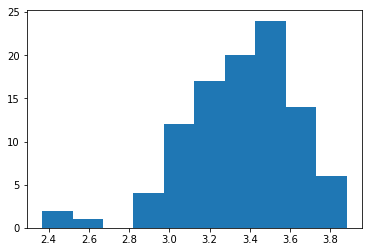

In [163]:
plt.hist(df['hostname_entropy']);

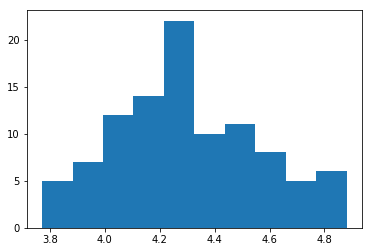

In [164]:
plt.hist(df['url_entropy']);

In [26]:
df['length_url'].describe()

count    100.000000
mean      75.700000
std       51.924479
min       28.000000
25%       44.750000
50%       61.500000
75%       89.250000
max      423.000000
Name: length_url, dtype: float64

In [58]:
df['subdomain'].value_counts(dropna=False)[:10]

www             50
                34
catused          3
catmag           1
recursos         1
press            1
cuttingtools     1
avtomati         1
24eiq            1
findnsave        1
Name: subdomain, dtype: int64

In [55]:
df['special_char_ind'].value_counts()

0    95
1     5
Name: special_char_ind, dtype: int64

In [165]:
df['suffix'].value_counts(dropna=False)[:10]

com    100
Name: suffix, dtype: int64

In [415]:
filename = 'train_df.pkl'
filename.split('.pkl')[0]

'train_df'

In [416]:
import time

In [417]:
start_time = time.time()
time.sleep(5)
duration = time.time() - start_time
print('Elapsed time: {:.0f} seconds'.format(duration))

Elapsed time: 5
